<a href="https://colab.research.google.com/github/lima2403/ML-para-estimar-uma-venda/blob/main/Utiliza%C3%A7%C3%A3o_de_ML_para_estimar_uma_venda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando Bases de Vendas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
vendas = pd.read_excel('/content/Investimento_x_Venda.xlsx')
vendas.head()

,Investimento em marketing,Venda Qtd
0,20,118
1,25,142
2,40,225
3,52,260
4,67,295


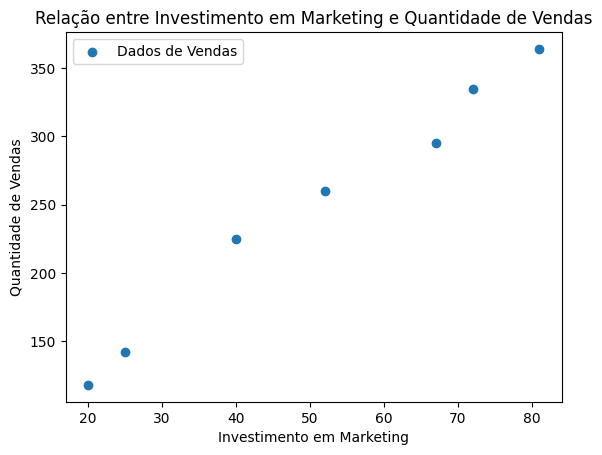

In [32]:
plt.scatter(vendas["Investimento em marketing"], vendas['Venda Qtd'])
plt.title('Relação entre Investimento em Marketing e Quantidade de Vendas')
plt.xlabel('Investimento em Marketing')
plt.ylabel('Quantidade de Vendas')
plt.legend(['Dados de Vendas'])
plt.show()

O grafico e a tabela nos mostram que os dados tem um relacionamento linear:

*   Quanto maior o investimento em marketing, maior a quantidade de vendas.


---





Usando função da reta para determinar o retorno de vendas investindo 75 mil:

<function matplotlib.pyplot.show(close=None, block=None)>

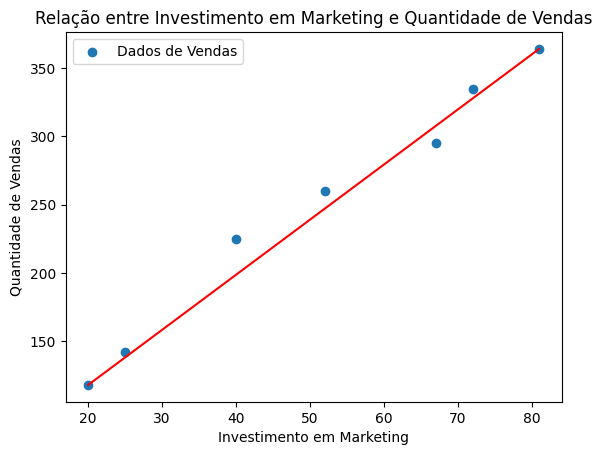

In [29]:
plt.scatter(vendas["Investimento em marketing"],vendas['Venda Qtd'])
plt.title('Relação entre Investimento em Marketing e Quantidade de Vendas')
plt.xlabel('Investimento em Marketing')
plt.ylabel('Quantidade de Vendas')
plt.legend(['Dados de Vendas'])
x0 = vendas["Investimento em marketing"][0]
y0 = vendas['Venda Qtd'][0]
x1 = vendas["Investimento em marketing"][6]
y1 = vendas['Venda Qtd'][6]
plt.plot([x0,x1],[y0,y1], "r")
plt.show

In [9]:
def EncontraY(x_reta,y_reta,x):
    a = (y_reta[1] - y_reta[0])/(x_reta[1] - x_reta[0])
    b = y_reta[1] - a*x_reta[1]
    y = a*x + b
    return y

In [10]:
EncontraY([x0,x1],[y0,y1],75)

339.8032786885246

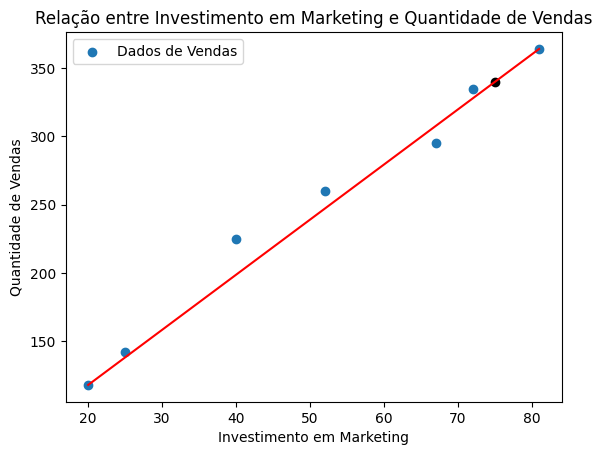


Caso seja investido R$75 mil, haverá um retorno de R$339.80
Cruzamento dos valores: 20.00 em Investimento em Marketing e 339.80 em Quantidade de Vendas


In [42]:
plt.scatter(vendas["Investimento em marketing"],vendas['Venda Qtd'])
plt.title('Relação entre Investimento em Marketing e Quantidade de Vendas')
plt.xlabel('Investimento em Marketing')
plt.ylabel('Quantidade de Vendas')
plt.legend(['Dados de Vendas'])
plt.scatter(75,EncontraY([x0,x1],[y0,y1],75), color = "k")
x0 = vendas["Investimento em marketing"][0]
y0 = vendas['Venda Qtd'][0]
x1 = vendas["Investimento em marketing"][6]
y1 = vendas['Venda Qtd'][6]
plt.plot([x0,x1],[y0,y1], "r")
plt.show()


# Imprimindo a saída formatada
retorno_75mil = EncontraY([x0, x1], [y0, y1], 75)
print()
print(f"Caso seja investido R$75 mil, haverá um retorno de R${retorno_75mil:.2f}")
print(f"Cruzamento dos valores: {x0:.2f} em Investimento em Marketing e {retorno_75mil:.2f} em Quantidade de Vendas")

# Utilizando Machine Learning para fazer a reta com um menor erro em uma regressão linear:

In [43]:
# importando a biblioteca sklearn
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(vendas["Investimento em marketing"].values.reshape(-1,1),vendas["Venda Qtd"])

LinearRegression()

In [22]:
reg.coef_

array([3.90643623])

In [24]:
reg.intercept_

49.200323514387804

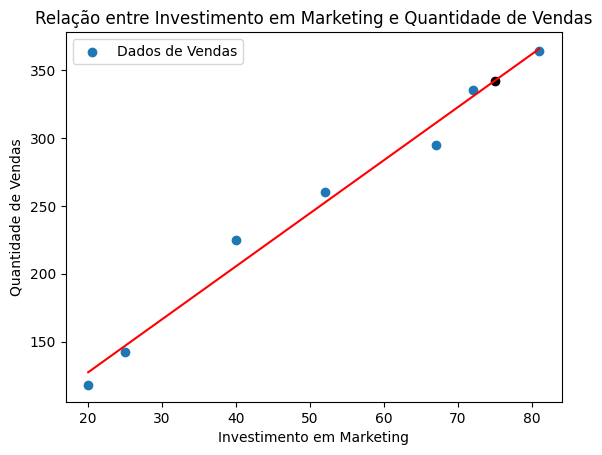

In [31]:
plt.scatter(vendas["Investimento em marketing"],vendas['Venda Qtd'])
plt.title('Relação entre Investimento em Marketing e Quantidade de Vendas')
plt.xlabel('Investimento em Marketing')
plt.ylabel('Quantidade de Vendas')
plt.legend(['Dados de Vendas'])
plt.scatter(75,reg.predict([[75]])[0], color = "k")
x = np.array(vendas["Investimento em marketing"])
y = reg.intercept_ + x*reg.coef_
plt.plot(x,y,"r")
plt.show()

Comparando os metodos de criação de graficos, o Machine Learning se provou superior, pois uso de Machine Learning oferece uma abordagem automatizada e adaptável para resolver problemas de regressão linear, proporcionando maior flexibilidade, precisão e eficiência em comparação com métodos tradicionais.